In [1]:
#import json file with the data
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
with open('web-app/backend/data/courses.json', encoding="utf-8") as f:
    data = json.load(f)

In [10]:
# Print the type of the data
print(f"Type of data: {type(data)}")

# print the keys
print(f"Keys: {data.keys()}")

# Get the list of events
veranstaltungen = data["veranstaltungen"]
veranstaltung_list = veranstaltungen["veranstaltung"]

Type of data: <class 'dict'>
Keys: dict_keys(['veranstaltungen'])


In [ ]:
# create a data frame of the data
df = pd.DataFrame(veranstaltung_list)
df.head()

,guid,nummer,name,untertitel,bezirk,dvv_kategorie,veranstaltungsart,minimale_teilnehmerzahl,aktuelle_teilnehmerzahl,maximale_teilnehmerzahl,...,zielgruppe,schlagwort,text,anmeldung,ansprechperson,ortetermine,preis,dozent,webadresse,merkmale
0,604369,FK3.840,Bodypercussion - der rhythmische Körperklang,None,Friedrichshain-Kreuzberg,"{'@version': '2.0', '#text': '3.00'}",Kurs,8,0,10,...,None,"[Fragen auf Englisch, GESUNDHEIT, KULTUR, MUSI...","[{'eigenschaft': 'Beschreibung', 'text': 'Body...","{'telefon': '90298-4600', 'mail': 'vhs@ba-fk.b...","{'anrede': 'Frau', 'titel': None, 'name': 'Hie...","{'adresse': [{'lehrstaette': 'VHS', 'plz': '10...","{'betrag': '31.00', 'rabatt_moeglich': 'true',...","{'anrede': 'Frau', 'titel': None, 'name': 'Ric...","{'typ': 'website', 'name': 'zur Kursbuchung', ...",NaN
1,610723,FK4.D-ik-179-5a,Deutsch B1.1,Aufbaumodul 5,Friedrichshain-Kreuzberg,"{'@version': '2.0', '#text': '4.04'}",Kurs,12,1,20,...,Menschen mit Migrationshintergrund,"[B1, BAMF Kursbeginn übermittelt, BAMF Kurspla...","[{'eigenschaft': 'Beschreibung', 'text': 'Vora...","{'telefon': '90298-4600', 'mail': 'vhs@ba-fk.b...","{'anrede': 'Frau', 'titel': None, 'name': 'Gru...","{'adresse': [{'lehrstaette': 'VHS', 'plz': '10...","{'betrag': '235.00', 'rabatt_moeglich': 'false...","{'anrede': 'Frau', 'titel': None, 'name': 'Ste...","{'typ': 'website', 'name': 'zur Kursbuchung', ...",NaN
2,656403,SZ810-29-04-01,Deutsch Integrationskurs A1.1,Basissprachkurs Modul 1,Steglitz-Zehlendorf,"{'@version': '2.0', '#text': '4.04'}",Kurs,8,6,12,...,Menschen mit Migrationshintergrund,"[A1, BAMF Kursbeginn übermittelt, BAMF Kurspla...","[{'eigenschaft': 'Beschreibung', 'text': 'Der ...","{'telefon': '(030) 90299 6156', 'mail': 'vhs-s...","{'anrede': 'Frau', 'titel': 'Dr.', 'name': 'Sc...","{'adresse': [{'lehrstaette': 'VHS', 'plz': '14...","{'betrag': '235.00', 'rabatt_moeglich': 'false...","[{'anrede': 'Frau', 'titel': None, 'name': 'Is...","{'typ': 'website', 'name': 'zur Kursbuchung', ...",NaN
3,658796,Mi404-B192S-13,Deutsch Orientierungskurs,None,Mitte,"{'@version': '2.0', '#text': '4.04'}",Kurs,8,5,16,...,Menschen mit Migrationshintergrund,"[BAMF Kursbeginn übermittelt, BAMF Kursplanung...","[{'eigenschaft': 'Beschreibung', 'text': 'Dies...","{'telefon': '9018 37474', 'mail': 'Infoservice...","{'anrede': 'Frau', 'titel': None, 'name': 'Mar...",{'adresse': [{'lehrstaette': 'VHS Berlin Mitte...,"{'betrag': '235.00', 'rabatt_moeglich': 'false...","{'anrede': 'Herr', 'titel': None, 'name': 'Luh...","{'typ': 'website', 'name': 'zur Kursbuchung', ...",NaN
4,683442,Sp4.224.W9,Deutsch Alphabetisierung W9,Deutsch Alphabetisierung-Integrationskurs,Spandau,"{'@version': '2.0', '#text': '4.04'}",Kurs,10,1,16,...,Menschen mit Migrationshintergrund,"[A1, A2, Alphabetisierung, BAMF Kursbeginn übe...","[{'eigenschaft': 'Beschreibung', 'text': 'Dies...","{'telefon': '90279 5000', 'mail': 'info@vhs-sp...","{'anrede': 'Frau', 'titel': None, 'name': 'Oem...",{'adresse': [{'lehrstaette': 'VHS-Filiale Eisw...,"{'betrag': '464.00', 'rabatt_moeglich': 'false...","{'anrede': 'Frau', 'titel': None, 'name': 'Sho...","{'typ': 'website', 'name': 'zur Kursbuchung', ...",NaN


In [ ]:
# list all the column names
print(df.columns)

Index(['guid', 'nummer', 'name', 'untertitel', 'bezirk', 'dvv_kategorie',
       'veranstaltungsart', 'minimale_teilnehmerzahl',
       'aktuelle_teilnehmerzahl', 'maximale_teilnehmerzahl', 'anzahl_termine',
       'beginn_datum', 'ende_datum', 'zielgruppe', 'schlagwort', 'text',
       'anmeldung', 'ansprechperson', 'ortetermine', 'preis', 'dozent',
       'webadresse', 'merkmale'],
      dtype='object')


In [ ]:
# column that matches our "category" filter
# "schlagwort" is the column that matches our "category" filter
# exploration of "schlagvor"
schlagwort = df["schlagwort"].tolist()
# print the first 10 elements
print(f"First 10 elements of schlagwort: {schlagwort[:20]}")
# unique categories in "schlagwort"
flattened_schlagwort = [item for sublist in df["schlagwort"] if isinstance(sublist, list) for item in sublist]
unique_schlagwort = set(flattened_schlagwort)
print(f"Number of unique schlagwort: {len(unique_schlagwort)}")
# print NAs 
na_count = df["schlagwort"].isna().sum()
print(f"Number of NAs: {na_count}")


First 10 elements of schlagwort: [['Fragen auf Englisch', 'GESUNDHEIT', 'KULTUR', 'MUSIK', 'Wochenendkurs'], ['B1', 'BAMF Kursbeginn übermittelt', 'BAMF Kursplanung aktualisieren übermittelt', 'BAMF Kursplanung übermittelt', 'Deutsch Fremdsprache', 'Intensivkurs', 'Migrant:innen', 'vhs.cloud'], ['A1', 'BAMF Kursbeginn übermittelt', 'BAMF Kursplanung aktualisieren übermittelt', 'BAMF Kursplanung übermittelt', 'Deutsch Fremdsprache', 'Migrant:innen', 'Präsenzkurs', 'SPRACHEN'], ['BAMF Kursbeginn übermittelt', 'BAMF Kursplanung aktualisieren übermittelt', 'BAMF Kursplanung übermittelt', 'Deutsch Fremdsprache', 'Flexikurs', 'Migrant:innen', 'Orientierungskurs', 'SPRACHEN', 'vhs-Lernportal', 'vhs.cloud'], ['A1', 'A2', 'Alphabetisierung', 'BAMF Kursbeginn übermittelt', 'BAMF Kursplanung aktualisieren übermittelt', 'BAMF Kursplanung übermittelt', 'Deutsch Fremdsprache', 'Migrant:innen', 'SPRACHEN'], ['Flexikurs', 'GESUNDHEIT', 'Pilates'], ['A2', 'BAMF Kursbeginn übermittelt', 'BAMF Kursplanun

#### Varibale "schlagwort"
- It has a lot of information, not only category names, also sentences addressing course level (Orientierungskurs), department (f.e. BAMF Kursbeginn übermittelt), target group, format (Präsenz), others (vhs-lernportal, vhs.could).

In [ ]:
# column that matches our "location/map area" filter
# "bezirk" matches the locality
# "ortetermine" matches the exact course location

In [20]:
# exploration of "bezirk"
bezirk = df["bezirk"].tolist()
# print the first 10 elements
print(f"First 10 elements of bezirk: {bezirk[:20]}")
#other basic exploration
print(f"Total number of records: {len(df)}")
print(f"Number of null values in bezirk: {df['bezirk'].isna().sum()}")
# Get all unique districts and their counts
bezirk_counts = df['bezirk'].value_counts()
print(f"Number of unique districts: {len(bezirk_counts)}")
print(bezirk_counts)

First 10 elements of bezirk: ['Friedrichshain-Kreuzberg', 'Friedrichshain-Kreuzberg', 'Steglitz-Zehlendorf', 'Mitte', 'Spandau', 'Friedrichshain-Kreuzberg', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln', 'Neukölln']
Total number of records: 8407
Number of null values in bezirk: 0
Number of unique districts: 13
bezirk
Tempelhof-Schöneberg          1041
Pankow                         983
Neukölln                       835
Reinickendorf                  742
Charlottenburg-Wilmersdorf     725
Mitte                          717
Steglitz-Zehlendorf            666
Friedrichshain-Kreuzberg       617
Treptow-Köpenick               588
Spandau                        558
Marzahn-Hellersdorf            496
Lichtenberg                    423
Servicezentrum                  16
Name: count, dtype: int64


In [24]:
# Check if values are already dictionaries
print("\nTypes of the first few values:")
print([type(x) for x in df['ortetermine'].head(5)])



Types of the first few values:
[<class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>]


In [28]:
# Let's first inspect a few values to understand the structure better
print("Sample ortetermine values:")
for i, val in enumerate(df['ortetermine'].head(5)):
    print(f"Entry {i+1}:", val)
    print("Keys:", val.keys() if isinstance(val, dict) else "Not a dictionary")
    print()
# More cautious extraction of location details
def extract_location_safely(x):
    if not isinstance(x, dict):
        return None
    
    # Check if 'adresse' exists and is a list with elements
    if 'adresse' in x and isinstance(x['adresse'], list) and len(x['adresse']) > 0:
        return x['adresse'][0]
    return None

# Apply the safer extraction function
df['location_details'] = df['ortetermine'].apply(extract_location_safely)
#  Check how many records have valid location details
print(f"Records with valid location details: {df['location_details'].notna().sum()} out of {len(df)}")

Sample ortetermine values:
Entry 1: {'adresse': [{'lehrstaette': 'VHS', 'plz': '10961', 'ort': 'Berlin', 'strasse': 'Bergmannstraße 28/29', 'raum': 'Raum 1.11', 'laengengrad': '13.393932', 'breitengrad': '52.489085', 'behindertenzugang': 'false'}, {'lehrstaette': 'VHS', 'plz': '10961', 'ort': 'Berlin', 'strasse': 'Bergmannstraße 28/29', 'raum': 'Raum E.13', 'laengengrad': '13.393932', 'breitengrad': '52.489085', 'behindertenzugang': 'false'}, {'lehrstaette': 'VHS', 'plz': '10961', 'ort': 'Berlin', 'strasse': 'Bergmannstraße 28/29', 'raum': 'Raum 1.11', 'laengengrad': '13.393932', 'breitengrad': '52.489085', 'behindertenzugang': 'false'}, {'lehrstaette': 'VHS', 'plz': '10961', 'ort': 'Berlin', 'strasse': 'Bergmannstraße 28/29', 'raum': 'Raum E.13', 'laengengrad': '13.393932', 'breitengrad': '52.489085', 'behindertenzugang': 'false'}], 'termin': [{'wochentag': 'Samstag', 'beginn_datum': '2025-03-29', 'beginn_uhrzeit': '11:00', 'ende_uhrzeit': '16:00'}, {'wochentag': 'Samstag', 'beginn_da

In [ ]:
# Now extract specific fields only from valid location details
df['vhs_name'] = df['location_details'].apply(
    lambda x: x.get('lehrstaette') if isinstance(x, dict) else None
)

# Analyze what we got
print("\nNon-null VHS names:", df['vhs_name'].notna().sum())
print("\nSample of VHS names:")
print(df['vhs_name'].dropna().sample(min(10, df['vhs_name'].notna().sum())).tolist())

# Proceed with the rest of the analysis if we have valid data
if df['vhs_name'].notna().any():
    # Create a mapping between districts and VHS locations
    valid_locations = df.dropna(subset=['bezirk', 'vhs_name'])
    if len(valid_locations) > 0:
        location_mapping = valid_locations.groupby('bezirk')['vhs_name'].unique()
        print("\nDistrict to VHS mapping:")
        for district, locations in location_mapping.items():
            print(f"{district}: {', '.join(locations)}")



Non-null VHS names: 7072

Sample of VHS names:
['Kultur- und Bildungszentrum Sebastian Haffner', 'VHS Berlin Mitte', 'VHS Lernzentrum', 'VHS Pankow online', 'Schöneberg, Online', 'Turnhalle Merlitzstraße', 'VHS', 'VHS', 'VHS', 'Haus der Volkshochschule']

District to VHS mapping:
Charlottenburg-Wilmersdorf: VHS Prinzregentenstraße, Haus der Volkshochschule, Interkulturelles Stadtteilzentrum Divan, Onlinekurse VHS City West, Rathaus Charlottenburg-Wilmersdorf, Cecilien - Grundschule, Friedrich-Ebert-Gymnasium, VHS Hohenzollerndamm, Haus am Mierendorffplatz, Stadtteilbibliothek Halemweg, Jugendclub Heckerdamm, Evangelische Lindenkirche, Mierendorffgrundschule, Turnhalle, Trinitatis Gemeinde, Haus der Familie, Familienzentrum Groß und Klein, Campus Daniel , Familienzentrum, Reinhold-Otto-Grundschule, Paula-Fürst-Schule
Friedrichshain-Kreuzberg: VHS, FSV A.Koch e.V. / Andreas Gymnasium, Haus des Sports, Laskerhöfe, DAS HAUS, Zentrum für Yoga und Stimme, Lina-Morgenstern-Gemeinschaftsschul

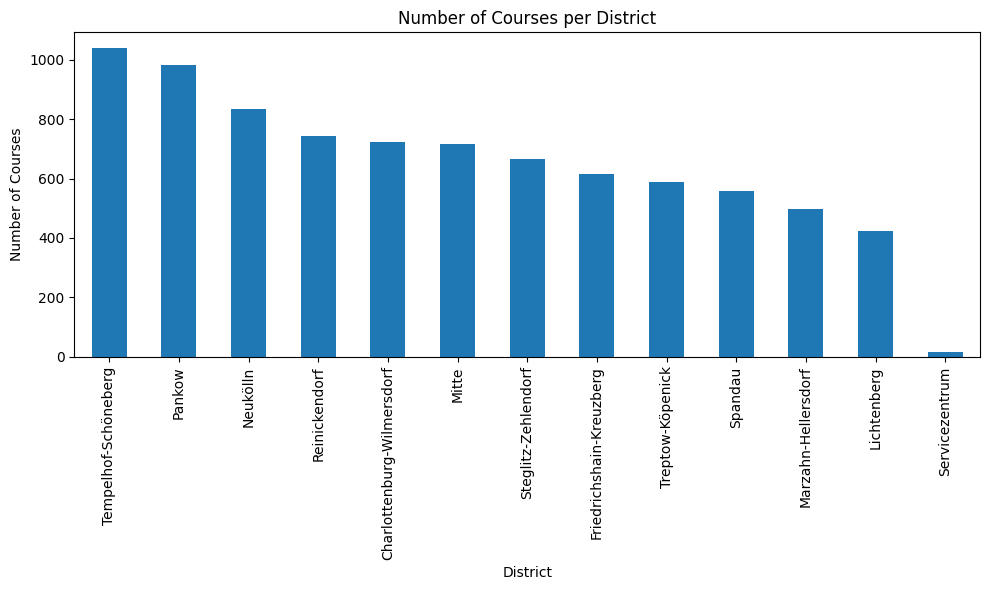

In [33]:
# plot the data
plt.figure(figsize=(10, 6))
df['bezirk'].value_counts().plot(kind='bar')
plt.title('Number of Courses per District')
plt.xlabel('District')
plt.ylabel('Number of Courses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()